In [1]:
import numpy as np
import tensorflow as tf

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
simple_ann_train_features = np.loadtxt('simple_ann_train_features.out', dtype='float32', delimiter=' ')

In [3]:
simple_ann_test_features = np.loadtxt('simple_ann_test_features.out', dtype='float32', delimiter=' ')

In [4]:
simple_ann_train_features.shape

(60000, 512)

In [5]:
simple_ann_test_features.shape

(10000, 512)

In [6]:
(_, y_train), (_, y_test) = mnist.load_data()

In [7]:
y_train = tf.keras.utils.to_categorical(
    y_train, dtype='float32'
)

In [8]:
y_test = tf.keras.utils.to_categorical(
    y_test, dtype='float32'
)

In [9]:
model = Sequential()

model.add(Dense(512, input_shape=(512,)))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience=32)

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(simple_ann_train_features,
                    y_train,
                    epochs=250, 
                    batch_size=32, 
                    verbose=0, 
                    validation_split=0.2, 
                    callbacks=[earlyStopping])

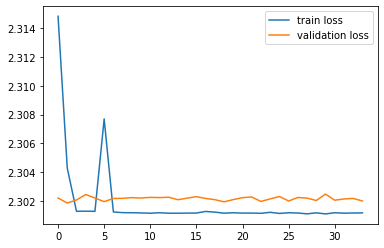

In [10]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

In [12]:
test_results = model.evaluate(simple_ann_train_features, y_train, verbose=1)

1875/1875 [==============================] - 2s 1ms/step - loss: 2.3012 - accuracy: 0.1124


In [16]:
predictions = model.predict(simple_ann_train_features)

In [17]:
l = []
for y, p in zip(y_test, predictions): 
    l.append(y - p)

(array([90000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0., 10000.]),
 array([-0.11275501, -0.07870329, -0.04465157, -0.01059985,  0.02345187,
         0.05750358,  0.0915553 ,  0.12560703,  0.15965874,  0.19371046,
         0.22776218,  0.2618139 ,  0.29586563,  0.32991734,  0.36396906,
         0.39802077,  0.4320725 ,  0.4661242 ,  0.50017595,  0.53422767,
         0.5682794 ,  0.6023311 ,  0.6363828 ,  0.67043453,  0.70448625,
         0.73853797,  0.7725897 ,  0.8066414 ,  0.8406931 ,  0.87474483,
         0.90879655], dtype=float32),
 <BarContainer object of 30 artists>)

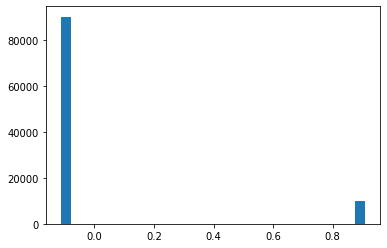

In [18]:
plt.hist(np.array(l).flatten(), bins=30)